In [79]:
''' BINARY LOGISTIC REGRESSION'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


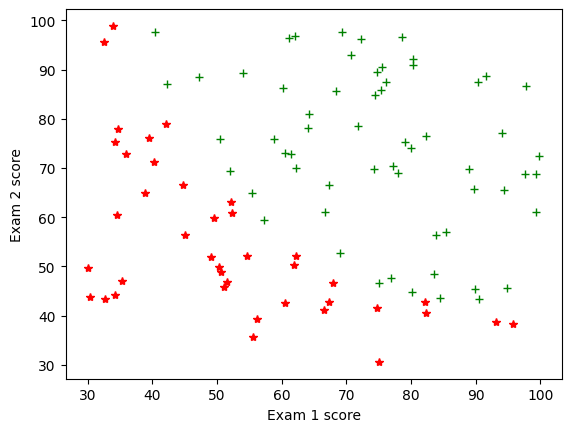

In [80]:
#1

#divide the data into parameters (X) and labels/classes (y)
X = data.values[:, :2].T
y = data.values[:, 2:].T

#2 Please plot the loaded data in the graph

for i in range(len(y[0])):
    if y[0, i] == 1:
        plt.plot(X[0, i], X[1, i], 'g+')
    if y[0, i] == 0:
        plt.plot(X[0, i], X[1, i], 'r*')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()


#create theta vector
theta = np.zeros((X.shape[0]+1, 1))

#add a row with values '1' on the top of the X matrix
X = np.concatenate([np.ones([1, X.shape[1]]), X])

#normalize features of X matrix
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

In [81]:
#3

def sig(t):
    return 1 / (1 + np.exp(-t))

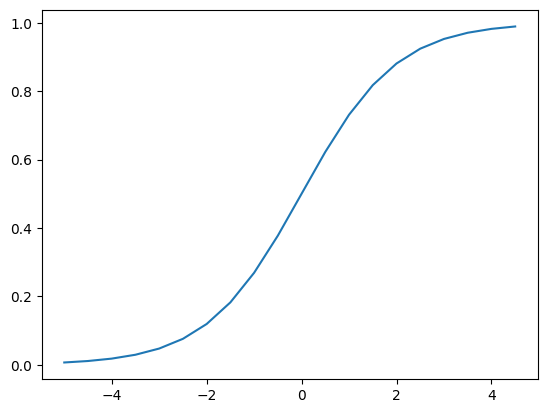

In [82]:
#4 Please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it

x_0 = np.arange(-5, 5, 0.5)
y_0 = sig(x_0)

plt.plot(x_0, y_0)
plt.show()

In [83]:
#5 Implement the cost function J (recommended vectorized solution).

def cost(theta, X, y):
    h = sig(theta.T@X)
    return sum(sum( (-y*(np.log(h))) - ( (1-y)*np.log(1-h)) ) ) / X.shape[1]  
    
print(cost(theta, X, y))

0.6931471805599458


In [84]:
#6 Implement simple gradient function

def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations

    cost_value = np.zeros(it)
    for i in range(it):
        for j in range(theta.shape[0]):
            h = sig(theta.T@X)
            theta[j] = theta[j] - (alpha * ( (sum((h-y)[0]*X[j])) / X.shape[1] ))
            
        cost_value[i] = cost(theta, X, y)
    cost_value = np.mean(cost_value)
    
    return theta, cost_value

In [85]:
alpha = 1
it = 150

theta_2, cost_value = simple_gradient(X, y, theta, alpha, it)
print(theta_2)
print(cost_value)

[[1.42929788]
 [3.38040725]
 [3.13521188]]
0.2318253404218613


In [86]:
#7 present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5

def mode(tm):
    tm[tm > 0.5] = 1
    tm[tm < 0.5] = 0
    return tm

def sig(t):
    return 1 / (1 + np.exp(-mode(t)))

theta = np.zeros((X.shape[0], 1))

theta, cost_value = simple_gradient(X, y, theta, alpha, it)
print(theta)
print(cost_value)

[[-1.52993072]
 [31.65356277]
 [28.60886143]]
0.5282595001346434


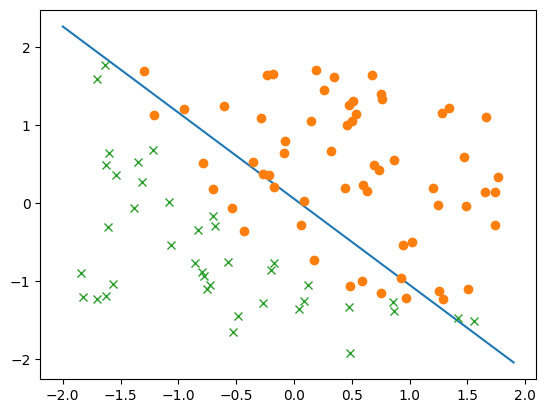

In [87]:
#8 Plot the decision boundary

x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o')
plt.plot(X1_0, X2_0, 'x')
plt.show()

In [88]:
'''Logistic regression - Python'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

#1 Choose appropriate optimalization algorithm, regularization coefficient and create a regression model.

model = LogisticRegression(random_state=0).fit(X, Y)

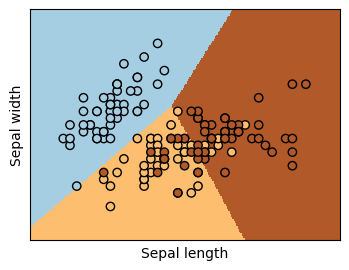

In [89]:
#2

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [90]:
#3 Using method predict_proba please predict the probability of being a member of a given class.

model.predict_proba(X[:2, :])

array([[0.9234642 , 0.05850676, 0.01802904],
       [0.79151359, 0.18095276, 0.02753365]])